# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# *******REMEMBER TO CHANGE THE SIZE BACK TO 1500********
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# Build query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold response info
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    print(f"Processing Record | {city}")
   
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print(f"{city} not found. Skipping...")
        pass




Beginning Data Retrieval
------------------------
Processing Record | palmer
Processing Record | lasa
Processing Record | jamestown
Processing Record | provideniya
Processing Record | ushuaia
Processing Record | upernavik
Processing Record | fortuna
Processing Record | rikitea
Processing Record | hermanus
Processing Record | the valley
Processing Record | hamilton
Processing Record | vardo
Processing Record | beyneu
Processing Record | clyde river
Processing Record | tuktoyaktuk
Processing Record | myitkyina
Processing Record | longyearbyen
Processing Record | hilo
Processing Record | thompson
Processing Record | eenhana
Processing Record | chokurdakh
Processing Record | magnor
Processing Record | iqaluit
Processing Record | torbay
Processing Record | hithadhoo
Processing Record | port elizabeth
Processing Record | turbat
Processing Record | sentyabrskiy
sentyabrskiy not found. Skipping...
Processing Record | albany
Processing Record | karratha
Processing Record | byron bay
Processing 

belushya guba not found. Skipping...
Processing Record | tateyama
Processing Record | lagos
Processing Record | pousat
pousat not found. Skipping...
Processing Record | alyangula
Processing Record | comodoro rivadavia
Processing Record | pamplona
Processing Record | namatanai
Processing Record | bloomfield
Processing Record | paamiut
Processing Record | kahului
Processing Record | port hedland
Processing Record | west plains
Processing Record | gambela
Processing Record | capela do alto
Processing Record | novobirilyussy
Processing Record | zwedru
Processing Record | mangai
Processing Record | ouesso
Processing Record | taoudenni
Processing Record | saleaula
saleaula not found. Skipping...
Processing Record | port blair
Processing Record | ginir
Processing Record | roald
Processing Record | svetlyy
Processing Record | melfi
Processing Record | hatillo de loba
Processing Record | mercedes
Processing Record | yangjiang
Processing Record | san cristobal
Processing Record | lahore
Processi

Processing Record | ituni
ituni not found. Skipping...
Processing Record | kilinochchi
Processing Record | ruatoria
ruatoria not found. Skipping...
Processing Record | urdzhar
urdzhar not found. Skipping...
Processing Record | jibuti
Processing Record | khor
Processing Record | luan
Processing Record | twin falls
Processing Record | houma
Processing Record | tecpan
Processing Record | oranjestad
Processing Record | dothan
Processing Record | vytegra
Processing Record | jiwani
Processing Record | caravelas
Processing Record | aleksandrov gay
Processing Record | vila velha
Processing Record | muramatsu
Processing Record | teya
Processing Record | tianpeng
Processing Record | linfen
Processing Record | isiro
Processing Record | sahrak
sahrak not found. Skipping...
Processing Record | ballina
Processing Record | san julian
Processing Record | batangafo
Processing Record | nantucket
Processing Record | wajir
Processing Record | grand gaube
Processing Record | mut
Processing Record | ciro ma

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary so we can create a dataframe
weather_data = {
    "City": cities,
    "Latitude": lat,
    "Longitude": long,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

# Create dataframe
weather_data_df = pd.DataFrame.from_dict(weather_data, orient='index')
weather_data_df = weather_data_df.transpose()
weather_data_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palmer,42.16,-72.33,69.01,100,1,2.62,US,1595651054
1,lasa,46.62,10.7,52,93,75,4.7,IT,1595651054
2,jamestown,42.1,-79.24,66.99,93,40,3.51,US,1595651054
3,provideniya,64.38,-173.3,50.81,69,99,3.58,RU,1595651054
4,ushuaia,-54.8,-68.3,28.4,74,75,13.87,AR,1595650921
...,...,...,...,...,...,...,...,...,...
583,wanning,None,None,None,None,None,None,None,None
584,huilong,None,None,None,None,None,None,None,None
585,louisbourg,None,None,None,None,None,None,None,None
586,giovinazzo,None,None,None,None,None,None,None,None


In [5]:
# Export dataframe to csv
weather_data_df.to_csv(output_data_file)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data_df = weather_data_df[weather_data_df['Humidity'] <= 100]
clean_city_data_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palmer,42.16,-72.33,69.01,100,1,2.62,US,1595651054
1,lasa,46.62,10.7,52,93,75,4.7,IT,1595651054
2,jamestown,42.1,-79.24,66.99,93,40,3.51,US,1595651054
3,provideniya,64.38,-173.3,50.81,69,99,3.58,RU,1595651054
4,ushuaia,-54.8,-68.3,28.4,74,75,13.87,AR,1595650921
...,...,...,...,...,...,...,...,...,...
537,batangafo,59.76,18.7,55.99,75,18,4,SE,1595651129
538,nantucket,18.8,110.4,90.52,59,56,11.01,CN,1595651129
539,wajir,31.81,121.66,91,52,64,1.01,CN,1595651129
540,grand gaube,41.19,16.67,73,88,1,4.7,IT,1595651129


In [7]:
# Export the City_Data into a csv
clean_city_data_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

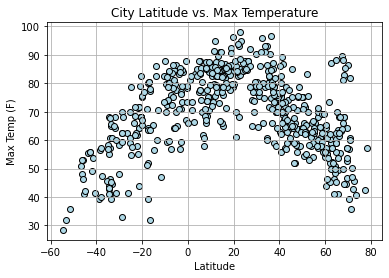

In [8]:
# Build scatter plot for latitude vs. temp
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Max Temp"], marker="o", facecolors="lightblue", edgecolors="black")

# Format scatter plot
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsMaxTemp.png")

plt.show()

## Latitude vs. Humidity Plot

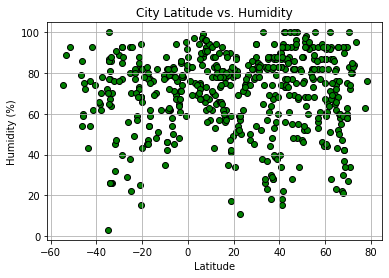

In [9]:
# Build scatter plot for latitude vs. humidity
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity"], marker="o", facecolors="green", edgecolors="black")

# Format scatter plot
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsHumidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

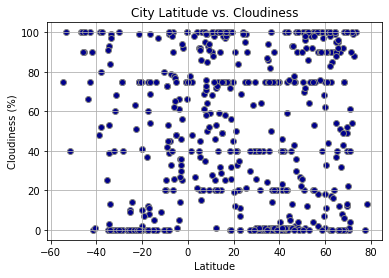

In [10]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloudiness"], marker="o", facecolors="darkblue", edgecolors="gray")

# Format scatter plot
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsCloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

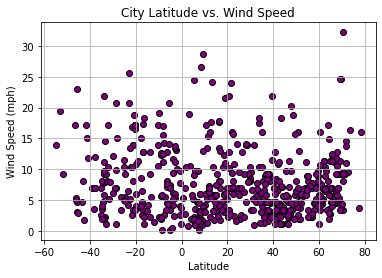

In [11]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed"], marker="o", facecolors="purple", edgecolors="black")

# Format scatter plot
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsWindSpeed.png")

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [12]:
# Create Northern Hemisphere DataFrame
north_hemi_df = clean_city_data_df[clean_city_data_df['Latitude'] >= 0]
north_hemi_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palmer,42.16,-72.33,69.01,100,1,2.62,US,1595651054
1,lasa,46.62,10.7,52,93,75,4.7,IT,1595651054
2,jamestown,42.1,-79.24,66.99,93,40,3.51,US,1595651054
3,provideniya,64.38,-173.3,50.81,69,99,3.58,RU,1595651054
5,upernavik,72.79,-56.15,45.64,84,88,9.62,GL,1595651055
...,...,...,...,...,...,...,...,...,...
535,ballina,35.37,132.77,82.4,69,75,10.29,JP,1595651129
537,batangafo,59.76,18.7,55.99,75,18,4,SE,1595651129
538,nantucket,18.8,110.4,90.52,59,56,11.01,CN,1595651129
539,wajir,31.81,121.66,91,52,64,1.01,CN,1595651129


In [13]:
# Create southern hemisphere dataframe
south_hemi_df = clean_city_data_df[clean_city_data_df['Latitude'] < 0]
south_hemi_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,ushuaia,-54.8,-68.3,28.4,74,75,13.87,AR,1595650921
7,rikitea,-23.12,-134.97,68.52,77,0,20.69,PF,1595651055
8,hermanus,-34.42,19.23,55,86,0,1.99,ZA,1595651055
19,eenhana,-17.47,16.33,51.8,47,0,4.7,NA,1595651056
24,hithadhoo,-0.6,73.08,78.46,82,100,7.78,MV,1595650946
...,...,...,...,...,...,...,...,...,...
509,burhaniye,-29.95,-71.34,48.2,76,0,6.11,CL,1595651125
513,kilinochchi,-8.14,159.59,84.25,72,100,12.39,SB,1595651126
528,vila velha,-21.57,21.78,43.74,85,0,10.36,BW,1595651128
536,san julian,-31.43,152.92,60.01,91,68,7.9,AU,1595651129


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.42637971243666783


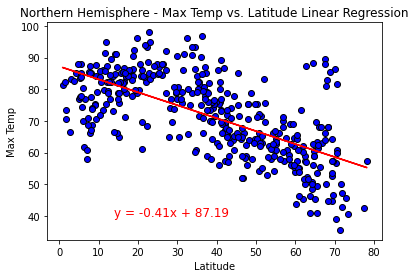

In [14]:
# Define x and y values
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Max Temp']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(14,40),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/NorthernHemiMaxTempVsLatLR.png")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5183932132362018


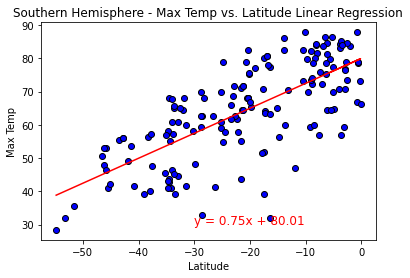

In [15]:
# Define x and y values
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Max Temp']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/SouthernHemiMaxTempVsLatLR.png")

plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007125826811416904


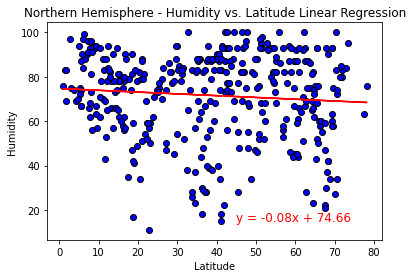

In [16]:
# Define x and y values
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Humidity']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/NorthernHemiHumidityVsLatLR.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004003270532503277


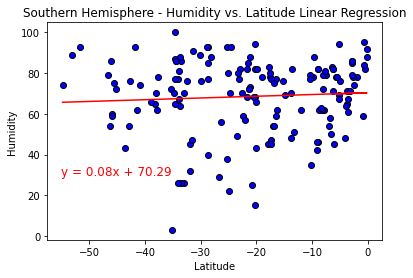

In [17]:
# Define x and y values
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Humidity']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/SouthernHemiHumidityVsLatLR.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003436872202335324


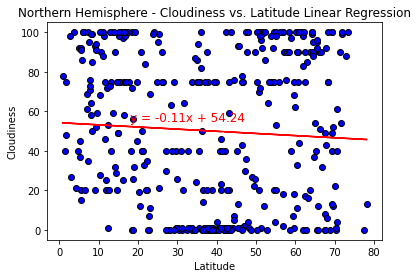

In [18]:
# Define x and y values
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Cloudiness']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,55),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/NorthernHemiCloudinessVsLatLR.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0009290159984701082


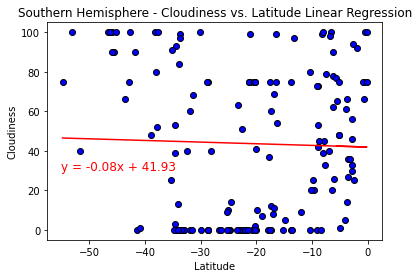

In [19]:
# Define x and y values
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Cloudiness']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/SouthernHemiCloudinessVsLatLR.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0020467492213632798


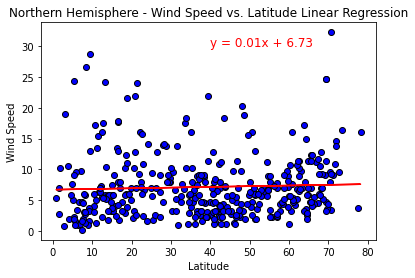

In [20]:
# Define x and y values
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Wind Speed']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/NorthernHemiWindSpeedVsLatLR.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005759200210724377


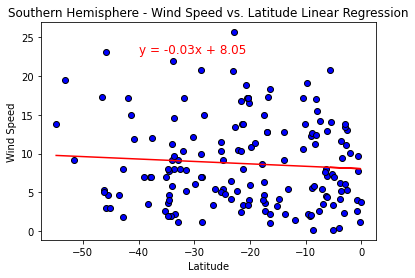

In [21]:
# Define x and y values
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Wind Speed']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,23),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/SouthernHemiWindSpeedVsLatLR.png")

plt.show()